> 200724.ipynb 에 이어서...


## 일반 값 사용 크로스 엔트로피 손실 함수

- **tf.keras.losses.categorical_crossentropy**

  - 정답 : 원 핫 인코딩 유형 ; y_true = [[0, 1, 0], [0, 0, 1]]  

- **tf.keras.losses.sparse_categorical_crossentropy**  

  - 정답 : 일반 유형 ; y_true = [[1],[2]]  

```py
import tensorflow as tf

# y_true = [[0, 1, 0], [0, 0, 1]]
y_true = [[1], [2]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

loss.numpy()
```

In [1]:
## 일반 값 사용 크로스 엔트로피 손실 함수  

import tensorflow as tf

# y_true = [[0, 1, 0], [0, 0, 1]]
y_true = [[1], [2]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

loss.numpy()

array([0.05129344, 2.3025851 ], dtype=float32)

## 일반 값을 원 핫으로 변환  

- **일반 값을 원 핫으로 변환해 크로스 엔트로피 손실 함수**  

```py
import tensorflow as tf

y_true = [[1], [2]]
y_true = tf.one_hot(y_true, depth=3)

print(y_true)

y_true = tf.reshape(y_true, [-1, 3])

print(y_true)

y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)

loss.numpy()
```

In [2]:
## 일반 값을 원 핫으로 변환

y_true = [[1], [2]]
y_true = tf.one_hot(y_true, depth=3)

print(y_true)

y_true = tf.reshape(y_true, [-1, 3])

print(y_true)

y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)

loss.numpy()

tf.Tensor(
[[[0. 1. 0.]]

 [[0. 0. 1.]]], shape=(2, 1, 3), dtype=float32)
tf.Tensor(
[[0. 1. 0.]
 [0. 0. 1.]], shape=(2, 3), dtype=float32)


array([0.05129331, 2.3025851 ], dtype=float32)

## 크로스 엔트로피 

- **비용함수 : Cross entropy**  

H(p,q) = - 시그마(p(x) log q(x))  

- p(x) : 실제 분류 값 
- q(x) : softmax 결과 값(y)  


## 크로스 엔트로피 손실 값 직접 계산  

```py
import tensorflow as tf
import numpy as np


y_true = tf.reshape(tf.one_hot([[1], [2]], depth=3), [-1, 3])

y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)  

print(loss.numpy())

print(-np.log(0.95), -np.log(0.1))
```

In [5]:
## 크로스 엔트로피 손실 값 직접 계산  

import numpy as np

y_true = tf.reshape(tf.one_hot([[1], [2]], depth=3), [-1, 3])

y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)  

print(loss.numpy())

print(-np.log(0.95), -np.log(0.1))

[0.05129331 2.3025851 ]
0.05129329438755058 2.3025850929940455


## Softmax 함수  

- **확률 값**  

  - 결과를 모두 더하면 1

```py
import tensorflow as tf
import numpy as np

a = np.array([[0.3, 2.9, 4.0]])
sm = tf.keras.activations.softmax(tf.convert_to_tensor(a))

print(sm.numpy())
```

In [6]:
## Softmax 함수

a = np.array([[0.3, 2.9, 4.0]])
sm = tf.keras.activations.softmax(tf.convert_to_tensor(a))

print(sm.numpy())

[[0.01821127 0.24519181 0.73659691]]


# 5장 분류  

## 이항 분류: 레드 와인과 화이트 와인 구분  

### 와인 데이터 셋  

- **캘리포니아 어바인 대학 제공**

- **특징 12개, p108**

```py
import pandas as pd

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")

print(red.head())
print(white.head())
```

In [7]:
## 와인 데이터 셋

import pandas as pd

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")

print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

### 와인 데이터셋 합치기  

- **두 데이터를 합하여**

  - 메소드 pd.concat()

- **와인 구분, 열 type 추가**  

  - 레드 와인 : 0
  - 화이트 와인 : 1

```py
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])

print(wine.describe())
```

In [8]:
## 와인 데이터셋 합치기  

red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])

print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

### 레드 와인 화이트 와인 수  

```py
import matplotlib.pyplot as plt

plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print(wine['type'].value_counts())
```

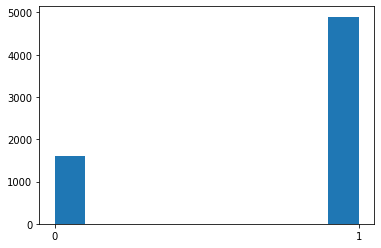

1    4898
0    1599
Name: type, dtype: int64


In [10]:
### 레드 와인 화이트 와인 수 

import matplotlib.pyplot as plt

plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print(wine['type'].value_counts())

### 정규화  

- **정규화 이후**

  - 최소 0, 최대 1  


```py
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

print(wine_norm.head())
print(wine_norm.describe())
```

In [11]:
### 정규화  

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

### 레드와인과 화이트 와인 행 섞기  

```py
import numpy as np

wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())

wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])
```

In [12]:
### 레드 와인과 화이트 와인 행 섞기

wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())

wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
4590       0.214876          0.166667     0.180723  ...  0.449275  0.500000   1.0
4589       0.132231          0.140000     0.228916  ...  0.637681  0.500000   1.0
2910       0.190083          0.193333     0.120482  ...  0.217391  0.333333   1.0
330        0.528926          0.186667     0.385542  ...  0.652174  0.500000   0.0
894        0.165289          0.120000     0.108434  ...  0.434783  0.666667   1.0

[5 rows x 13 columns]
[[0.21487603 0.16666667 0.18072289 0.10122699 0.05315615 0.14236111
  0.37327189 0.11952959 0.3875969  0.15168539 0.44927536 0.5
  1.        ]
 [0.1322314  0.14       0.22891566 0.00920245 0.03322259 0.10416667
  0.29032258 0.0354733  0.43410853 0.07865169 0.63768116 0.5
  1.        ]
 [0.19008264 0.19333333 0.12048193 0.10736196 0.03654485 0.16666667
  0.37788018 0.16329285 0.3875969  0.14606742 0.2173913  0.33333333
  1.        ]
 [0.52892562 0.18666667 0.38554217 0.03527607 0.1

### 학습 데이터와 테스트 데이터 분리  

 - **특징에서 마지막 값을 정답으로**

 - **정답을 원 핫 인코딩으로**  

```py
import tensorflow as tf  

train_idx = int(len(wine_np) * 0.8)

# :-1 -> 정답 제외, -1 -> 정답만
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]

test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])  

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)

test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)  

print(train_Y[0])
print(test_Y[0])
 ```

 > 그림은 [문서](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B05-1%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0806%EB%AA%A9%201~2%EA%B5%90%EC%8B%9C%20p30)%205%EC%9E%A5%20%EB%B6%84%EB%A5%98%3B%20%EC%99%80%EC%9D%B8%20MNIST%20%ED%8C%A8%EC%85%98.pdf) p.8 쪽 참고

In [13]:
### 학습 데이터와 테스트 데이터 분리

train_idx = int(len(wine_np) * 0.8)

# :-1 -> 정답 제외, -1 -> 정답만
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]

test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])  

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)

test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)  

print(train_Y[0])
print(test_Y[0])

[0.21487603 0.16666667 0.18072289 0.10122699 0.05315615 0.14236111
 0.37327189 0.11952959 0.3875969  0.15168539 0.44927536 0.5       ]
1.0
[0.33884298 0.12666667 0.1626506  0.01687117 0.04152824 0.08333333
 0.26728111 0.0726817  0.19379845 0.16292135 0.56521739 0.5       ]
1.0
[0. 1.]
[0. 1.]


### 원 핫 인코딩  

```py
y = [0, 1, 2, 3]

tf.keras.utils.to_categorical(y, num_classes=4)
```

In [14]:
### 원 핫 인코딩

y = [0, 1, 2, 3]

tf.keras.utils.to_categorical(y, num_classes=4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

### 딥러닝 모델  

```py
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
  tf.keras.layers.Dense(units=24, activation='relu'),
  tf.keras.layers.Dense(units=12, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='softmax'),
])


model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07), loss='categorical crossentropy', metrics=['accuracy'])

model.summary()
```

In [16]:
### 딥러닝 모델

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
  tf.keras.layers.Dense(units=24, activation='relu'),
  tf.keras.layers.Dense(units=12, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='softmax'),
])


model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07), loss='categorical crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


### 분류에서의 활성화 함수  

- **마지막 층은**

  - 소프트맥스 함수

    - 결과의 총합은 1
    - 큰 값을 강조하고 작은 값은 약화시키는 효과  

```py
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
  tf.keras.layers.Dense(units=24, activation='relu'),
  tf.keras.layers.Dense(units=12, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='softmax'),
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07), loss = 'categorical_crossentropy', metrics=['accuary'])

model.summary()
```

In [17]:
### 분류에서의 활성화 함수 

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
  tf.keras.layers.Dense(units=24, activation='relu'),
  tf.keras.layers.Dense(units=12, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='softmax'),
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07), loss = 'categorical_crossentropy', metrics=['accuary'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


### 소프트맥스 함수  

그림 참고

[그림참고 바로가기](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B05-1%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0806%EB%AA%A9%201~2%EA%B5%90%EC%8B%9C%20p30)%205%EC%9E%A5%20%EB%B6%84%EB%A5%98%3B%20%EC%99%80%EC%9D%B8%20MNIST%20%ED%8C%A8%EC%85%98.pdf) p.12 참고

### 지수승 e^x 효과  

- **자연수 e를 밑으로 하는 지수 함수**  

  - 음수는 양수로
  - 작은 수는 작게, 큰 수는 더욱 크게  

```py
import matplotlib.pyplot as plt
import math
import numpy as np

x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()
```

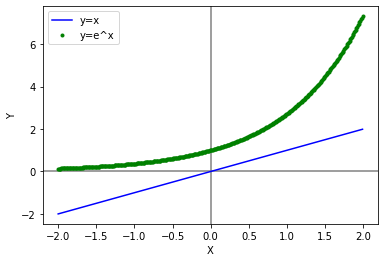

In [18]:
### 지수승 e^x 효과

import math

x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

### 학습  

```py
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)
```

In [37]:
### 학습

history = model.fit(train_X, 
                    train_Y, 
                    epochs=25, 
                    batch_size=32, 
                    validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8108 - accuracy: 0.5997 - val_loss: 0.8277 - val_accuracy: 0.6169
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8069 - accuracy: 0.5961 - val_loss: 0.8191 - val_accuracy: 0.6200
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8220 - accuracy: 0.5920 - val_loss: 0.8222 - val_accuracy: 0.6200
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.6051 - val_loss: 0.8241 - val_accuracy: 0.5992
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.7993 - accuracy: 0.6020 - val_loss: 0.8423 - val_accuracy: 0.5908
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8014 - accuracy: 0.5979 - val_loss: 0.8243 - val_accuracy: 0.6077
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.7928 - accuracy: 0.6128 - val_loss: 0.8296 - val_accuracy: 0.5900
Epoch 

### 학습 과정 시각화

```py
# 5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--',label='val_loss')

plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-',label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--',label='val_accuracy')

plt.xlabel('Epoch')
plt.ylim(0.7, 1)

plt.legend()
plt.show()
```

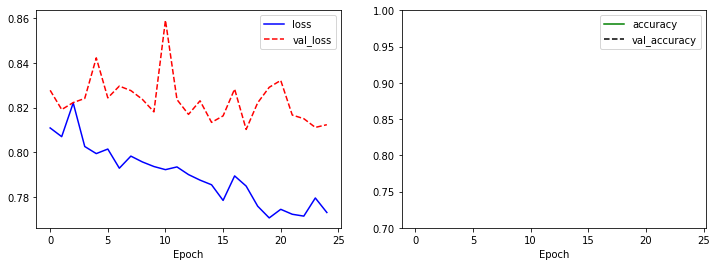

In [38]:
### 학습 과정 시각화

# 분류 모델 학습 결과 시각화

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--',label='val_loss')

plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-',label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--',label='val_accuracy')

plt.xlabel('Epoch')
plt.ylim(0.7, 1)

plt.legend()
plt.show()

### 평가

```py
# 분류 모델 평가

model.evaluate(test_X, test_Y)
```

In [40]:
### 평가

# 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 917us/step - loss: 0.8018 - accuracy: 0.6408


[0.8018255829811096, 0.6407692432403564]

## 다항 분류 : 와인 품질 분류  

### 와인 데이터 셋의 'quality'

- **등급 3~9**

  - 이 모든 등급을 예측하기에는 등급에 따른 데이터 수 차이가 큼  

    - 다시 등급을 3개 정도로 나누어 예측  

```py
# 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

# 품질 히스토그램 시각화

import matplotlib.pyplot as plt

plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()
```

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


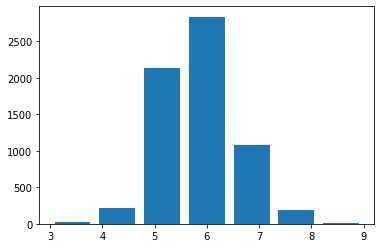

In [26]:
### 와인 데이터 셋의 'quality'

# 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

# 품질 히스토그램 시각화
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

### 새로운 등급인 new_quality를 생성  

- **조건에 맞는 값을 새로운 열에 추가**  

  - df.loc[data['컬럼'] 조건, '새로운 컬럼명'] = '값'

```py
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())
```

In [28]:
### 새로운 등급인 new_quality 를 생성

wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


### 정규화와 원 핫 인코딩  

```py
# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)
```

In [29]:
### 정규화와 원 핫 인코딩

# 5.15 데이터 정규화 및 train, test 데이터 분리

del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

### 딥러닝 모델  


```py
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
tf.keras.layers.Dense(units=24, activation='relu'),
tf.keras.layers.Dense(units=12, activation='relu'),
tf.keras.layers.Dense(units=3, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003),
loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=25, batch_size=32,
validation_split=0.25)
```

In [31]:
### 딥러닝 모델

# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
tf.keras.layers.Dense(units=24, activation='relu'),
tf.keras.layers.Dense(units=12, activation='relu'),
tf.keras.layers.Dense(units=3, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003),
loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=25, batch_size=32,
validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.9816 - accuracy: 0.5030 - val_loss: 0.8976 - val_accuracy: 0.5615
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8909 - accuracy: 0.5527 - val_loss: 0.8776 - val_accuracy: 0.5746
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8710 - accuracy: 0.5586 - val_loss: 0.8647 - val_accuracy: 0.5885
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8650 - accuracy: 0.5576 - val_loss: 0.8782 - val_accuracy: 0.5692
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8670 - accuracy: 0.5635 - val_loss: 0.8537 - val_accuracy: 0.5838
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8573 - accuracy: 0.5720 - val_loss: 0.8500 - val_accuracy: 0.5923
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8542 - accuracy: 0.5715 - val_loss: 0.8507 - val_accuracy: 0.5877
Epoch 

### 학습 과정 시각화

```py
# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 0.7)
plt.legend()

plt.show()
```

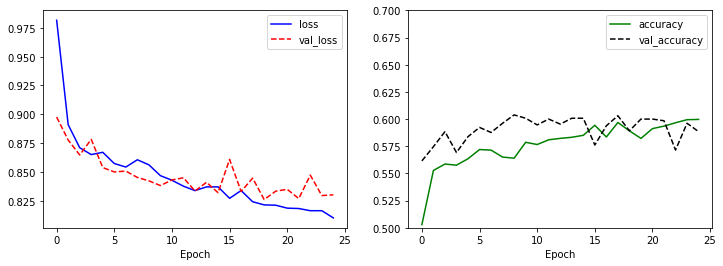

In [33]:
### 학습 과정 시각화

# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 0.7)
plt.legend()

plt.show()

### 평가

```py
# 다항 분류 모델 평가
model.evaluate(test_X, test_Y)
```

In [34]:
### 평가

# 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.8197 - accuracy: 0.6162


[0.8196863532066345, 0.6161538362503052]

## 다항 분류 :  패션 MNIST  

### Fasion-MNIST 데이터 저장  

- **미리 섞여진 fashion-mnist의 학습 데이터와 테스트 데이터 로드**  

```py
# 필요 모듈 임포트
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# ① 문제와 정답 데이터 지정
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

# 10 개의 분류 이름 지정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 전처리
# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
train_images, test_images = train_images / 255.0, test_images / 255.0
```

In [36]:
### Fashion-MNIST 데이터 저장

# 필요 모듈 임포트
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# ① 문제와 정답 데이터 지정
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 10 개의 분류 이름 지정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 전처리
# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
train_images, test_images = train_images / 255.0, test_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


### 데이터셋 불러오기  

```py
# Fashion MNIST 데이터셋 불러오기

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))
```

In [43]:
### 데이터셋 불러오기

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


### 데이터 확인  

```py
import matplotlib.pyplot as plt

plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])
```

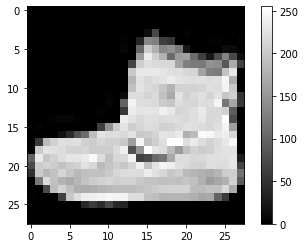

9


In [44]:
### 데이터 확인

import matplotlib.pyplot as plt

plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

### 정규화, 모델 생성과 학습  

- **loss='sparse_categorical_crossentropy'**

  - 정답을 원 핫 인코딩 불필요  

```py
# 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

# Fashion MNIST 분류 모델  

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Fashion MNIST 분류 모델 학습  

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)
```

In [45]:
### 정규화, 모델 생성과 학습  

# 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

# Fashion MNIST 분류 모델  

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Fashion MNIST 분류 모델 학습  

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

### 시각화  

```py
# Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')

plt.ylim(0.7, 1)
plt.legend()

plt.show()
```

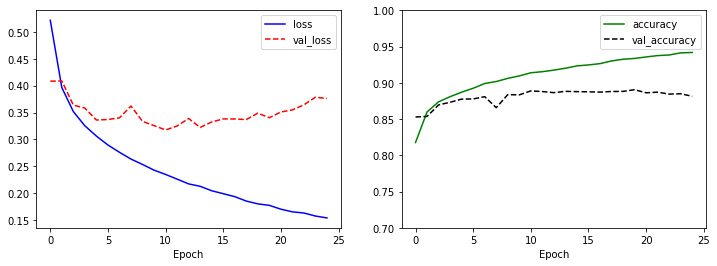

In [47]:
### 시각화

# Fashion MNIST 분류 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')

plt.ylim(0.7, 1)
plt.legend()

plt.show()

### 평가 

```py
# Fashion MNIST 분류 모델 평가  

model.evaluate(test_X, test_Y)
```

In [48]:
### 평가

# Fashion MNIST 분류 모델 평가

model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8774


[0.4146037995815277, 0.8773999810218811]

## MNIST 손글씨 - TF 튜토리얼  

## TF2 Quickstart Beginners

[TF2 Quickstart Beginners colab 바로가기](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb?hl=ko#scrollTo=3wF5wszaj97Y)

### MNIST 손글씨

```py
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
```

In [54]:
### MNIST 손글씨

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

### 손실함수 SparseCategoricalCrossentropy

- **tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)**  

  - 뉴런 결과가 softmax를 취한 확률 값이 아닌 경우, from_logits=True ; 기본은 softmax를 취한 결과로 from_logits=False  

  - 정답은 바로 정수  

```py
cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  

target = [[0], [1], [2]]
output = [[1.2, 0.3, 0.1], [.15, .89, .26], [.25, .41, .94]]

loss = cce(target, output)
print(loss.numpy())


cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)  

target = [[0], [1], [2]]
output = [[1.0, 0., 0.], [.05, .89, .06], [.05, .01, .94]]

loss = cce(target, output)
print(loss.numpy())
```

In [55]:
### 손실함수 SparseCategoricalCrossentropy

cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  

target = [[0], [1], [2]]
output = [[1.2, 0.3, 0.1], [.15, .89, .26], [.25, .41, .94]]

loss = cce(target, output)
print(loss.numpy())


cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)  

target = [[0], [1], [2]]
output = [[1.0, 0., 0.], [.05, .89, .06], [.05, .01, .94]]

loss = cce(target, output)
print(loss.numpy())

0.66293424
0.059469808


### 손실 함수 CategoricalCrossentropy  

- **tf.keras.losses.CategoricalCrossentropy(from_logits=True)**  

  - 뉴런 결과가 softmax를 취한 확률 값이 아닌 경우, from_logits=True

  - 정답은 분류의 원 핫 인코딩  

```py
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)  

target = [[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]]
output = [[1.2, 0.3, 0.1], [.15, .89, .26], [.25, .41, .94]]

loss = cce(target, output)
print(loss.numpy())


cce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)  

target = [[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]]
output = [[1.0, 0., 0.], [.05, .89, .06], [.05, .01, .94]]

loss = cce(target, output)
print(loss.numpy())
```

In [56]:
### 손실 함수 CategoricalCrossentropy


cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)  

target = [[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]]
output = [[1.2, 0.3, 0.1], [.15, .89, .26], [.25, .41, .94]]

loss = cce(target, output)
print(loss.numpy())


cce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)  

target = [[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]]
output = [[1.0, 0., 0.], [.05, .89, .06], [.05, .01, .94]]

loss = cce(target, output)
print(loss.numpy())

0.66293424
0.059469786


### 모델의 최적화 방법 및 손실 함수 지정  

```py
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
```

In [57]:
### 모델의 최적화 방법 및 손실 함수 지정  

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])


NameError: ignored

### 모델로 예측한 로짓

- **첫 학습 데이터를 model로 직접 로짓(logit) 값 생성**  

  - 각 자릿수의 벡터 값 반환  

    - 그 자릿수일 가능성에 대한 값, 클수록 높은 가능성  

    - 맞으면, 최대 값의 위치가 정답  

```py
print(y_train[0])  # 5
```

```py
predictions = model(x_train[:1]).numpy()
predictions
```

```py
tf.math.argmax(predictions, 1).numpy()
```

In [63]:
### 모델로 예측한 로짓

print(y_train[0])

predictions = model(x_train[:1]).numpy()
print(predictions)

tf.math.argmax(predictions, 1).numpy()

5
[[ 0.04413333 -0.52627236  0.11836725 -0.06450135 -0.16104147  0.44393522
  -0.12369056  0.1583241   0.22466515 -0.4900988 ]]


array([5])

### 결과 벡터를 확률 값으로 변환  

- **함수 softmax**  

  - 각 자릿수의 확률 값 

    - 합이 1  

```py
sm = tf.nn.softmax(predictions)
sm.numpy()


tf.reduce_sum(sm).numpy()

max = tf.math.reduce_max(sm).numpy()
print(max)
```

In [62]:
### 결과 벡터를 확률 값으로 변환  

sm = tf.nn.softmax(predictions)
sm.numpy()


tf.reduce_sum(sm).numpy()

max = tf.math.reduce_max(sm).numpy()
print(max)

0.15543418


### 손실 값 계산  

- **다음 두 손실 값이 동일**  

  - 우리가 정의한 손실 함수로 직접 계산  

    - loss_fn  

  -  맞는 자릿수 값의 -log(logits)

    - -log(max_logit_of_softmax)

  ```py
  loss_fn(y_train[:1], predictions).numpy()

  print(-tf.math.log(max).numpy())
  ```  

- **다음 값도 동일**  

  - 기본 인자가 from_logits = False이므로 예측 값을 softmax로 취한 결과인 sm을 사용해야 함  

  ```py
  # 다음 값도 같다.  

  tf.keras.losses.sparse_categorical_croosentropy(y_train[:1], sm).numpy()
  ```

In [64]:
### 손실 값 계산  

loss_fn(y_train[:1], predictions).numpy()

print(-tf.math.log(max).numpy())


tf.keras.losses.sparse_categorical_croosentropy(y_train[:1], sm).numpy()

NameError: ignored

### 훈련과 평가  

```py
model.fit(x_train, y_train, epochs=5)
```

```py
model.evaluate(x_test, y_test, verbose=2)
```

In [65]:
### 훈련과 평가

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

RuntimeError: ignored

### 테스트 데이터의 확률 값  

- **확률 모델 생성**  

  - 모델 마지막에 softmax() 적용 모델로 테스트 데이터 첫 5개 예측  

  - 이전 model에 softmax() 함수를 적용한 결과와 동일  

    - 첫 테스트 데이터만 시험함  

```py
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
```

```py
probability_model(x_test[:5])
```

```py
predictions = model(x_test[:1]).numpy()
sm = tf.nn.softmax(predictions)
sm.numpy()
```

In [67]:
### 테스트 데이터의 확률 값

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5]).numpy()

predictions = model(x_test[:1]).numpy()
sm = tf.nn.softmax(predictions)
sm.numpy()

array([[0.08328809, 0.11110085, 0.15547332, 0.09129548, 0.08323913,
        0.09070556, 0.12056007, 0.08757338, 0.08799111, 0.08877299]],
      dtype=float32)

## TF2로 직접 훈련시키는 MNIST 손글씨 구현

### MNIST 데이터 로드  

```py
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

print(tf.__version__, tf.executing_eagerly())
```

```py
# 1. 문제와 정답 데이터 지정

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
```

In [69]:
### MNIST 데이터 로드

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

print(tf.__version__, tf.executing_eagerly())


# 1. 문제와 정답 데이터 지정

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

2.3.0 True


### DataSet과 모델 생성

```py
# tf.data를 사용해 훈련 데이터와 검증 데이터를 나눔

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
```

```py
# 2 인공 신경망 모델 구성  

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
```

In [77]:
### DataSet과 모델 생성


# tf.data를 사용해 훈련 데이터와 검증 데이터를 나눔

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)



# 2 인공 신경망 모델 구성  

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


### 손실함수와 최적화 방법

```py
# 3) 학습에 필요한 최적화 방법과 손실 함수 등 지정  

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()


# 4) 생성된 모델로 훈련 데이터 학습
# 손실과 정확도를 위한 객체  

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
```

In [78]:
### 손실함수와 최적화 방법

# 3) 학습에 필요한 최적화 방법과 손실 함수 등 지정  

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()


# 4) 생성된 모델로 훈련 데이터 학습
# 손실과 정확도를 위한 객체  

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### 학습 과정과 테스트 과정의 함수  

```py
# GradientTape()로 모델을 훈련하는 함수

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different  
    # behavior during training versus inference (e.g. Dropout).

    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)

    # 손실 값을 최소화하는 패러미터를 계산해 최적화 과정을 수향
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))



train_loss(loss)
train_accuracy(labels, predictions)

# 모델을 테스트 또는 검증하기 위한 함수

@tf.function
def test_step(images, labels):
  # training=True is only needed if there are layers with different  
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)
```

In [79]:
### 학습 과정과 테스트 과정의 함수  


# GradientTape()로 모델을 훈련하는 함수

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different  
    # behavior during training versus inference (e.g. Dropout).

    # 손실 값을 최소화하는 패러미터를 계산해 최적화 과정을 수향
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))


  train_loss(loss)
  train_accuracy(labels, predictions)

# 모델을 테스트 또는 검증하기 위한 함수

@tf.function
def test_step(images, labels):
  # training=True is only needed if there are layers with different  
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)


### 5회 학습  

```py
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()


  for images, labels in train_ds:
    train_step(test_images, test_labels)

  # template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  template = '{} Epoch 손실={:.4f}, 정확도={:.4f}, 테스트손실={:.4f}, 테스트검정={:.4f}'

  print(template.format(epoch + 1,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        test_loss.result(),
                        test_accuracy.result() * 100))
```

In [81]:
### 5회 학습  

EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()


  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  # template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  template = '{} Epoch 손실={:.4f}, 정확도={:.4f}, 테스트손실={:.4f}, 테스트검정={:.4f}'

  print(template.format(epoch + 1,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        test_loss.result(),
                        test_accuracy.result() * 100))


1 Epoch 손실=0.2913, 정확도=91.5550, 테스트손실=0.1304, 테스트검정=96.0200
2 Epoch 손실=0.1446, 정확도=95.6583, 테스트손실=0.1061, 테스트검정=96.7300
3 Epoch 손실=0.1147, 정확도=96.5617, 테스트손실=0.0876, 테스트검정=97.3200
4 Epoch 손실=0.0953, 정확도=97.0317, 테스트손실=0.0793, 테스트검정=97.3800
5 Epoch 손실=0.0819, 정확도=97.4717, 테스트손실=0.0773, 테스트검정=97.4600


### 테스트 성능 평가

```py
# 5) 테스트 데이터로 성능 평가  

test_step(x_test, y_test)
print('테스트 데이터 정확도(Accuracy): %.4f' % (test_accuracy.result() * 100))
```

In [83]:
### 테스트 성능 평가

# 5) 테스트 데이터로 성능 평가  
 
test_step(x_test, y_test)
print('테스트 데이터 정확도(Accuracy): %.4f' % (test_accuracy.result() * 100))

테스트 데이터 정확도(Accuracy): 97.4600


## MNIST 패션 실행  


### 패션 MNIST 데이터셋  

-  **티셔츠, 부츠 등 패션의 10개 분류**

  - 손글씨와 구조는 비슷

    - 60000, 10000개, 28 X 28 이미지 구조, 10개의 분류

사진은 pdf 참고

[pdf 바로가기](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B05-3%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0806%EB%AA%A9%205~6%EA%B5%90%EC%8B%9C%20p30)%20MNIST%20%ED%8C%A8%EC%85%98%20%EC%86%8C%EA%B0%9C%EC%99%80%20%EA%B5%AC%ED%98%84.pdf)

### Fash-MNIST 데이터 저장  

- **미리 섞여진 fashion-mnist의 학습 데이터와 테스트 데이터 로드**  

```py
import tensorflow as tf
from tensorflow import keras  

# 1) 문제와 정답 데이터 지정  

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 10 개의 분류 이름 지정  
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 전처리
# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환  
train_images, test_images = train_images / 255.0, test_images / 255.0
```

In [85]:
### Fash-MNIST 데이터 저장  

import tensorflow as tf
from tensorflow import keras  

# 1) 문제와 정답 데이터 지정  

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 10 개의 분류 이름 지정  
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 전처리
# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환  
train_images, test_images = train_images / 255.0, test_images / 255.0


### 모델 구성  

- **3개의 은닉층 구성**  

```py
# 2) 모델 구성(생성)
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

# 3) 학습에 필요한 최적화 방법과 손실 함수 등 지정  
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력 정보를 선택  
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
```

In [86]:
### 모델 구성  

# 2) 모델 구성(생성)
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

# 3) 학습에 필요한 최적화 방법과 손실 함수 등 지정  
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력 정보를 선택  
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


### 학습과 평가

- **8회 학습**  

```py
# 4) 생성된 모델로 훈련 데이터 학습  
# 모델을 훈련 데이터로 총 8번 훈련
model.fit(train_images, train_labels, epochs=8)

# 5) 테스트 데이터로 성능 평가  
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)
```

In [87]:
### 학습과 평가

# 4) 생성된 모델로 훈련 데이터 학습  
# 모델을 훈련 데이터로 총 8번 훈련
model.fit(train_images, train_labels, epochs=8)

# 5) 테스트 데이터로 성능 평가  
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)


Epoch 1/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4760 - accuracy: 0.8274
Epoch 2/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3642 - accuracy: 0.8647
Epoch 3/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3242 - accuracy: 0.8798
Epoch 4/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3011 - accuracy: 0.8876
Epoch 5/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2825 - accuracy: 0.8950
Epoch 6/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2657 - accuracy: 0.8991
Epoch 7/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2558 - accuracy: 0.9036
Epoch 8/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2440 - accuracy: 0.9075
313/313 - 1s - loss: 0.3341 - accuracy: 0.8838

테스트 정확도: 0.8838000297546387


## MNIST 패션 이해를 위한 다양한 구현

### 텐서플로 튜토리얼  

- **메뉴**

  - 초보자 | 기본 이미지 분류

  [튜토리얼 바로가기](https://www.tensorflow.org/tutorials/keras/classification)

### 훈련과 테스트 데이터 이해  

- **shape**


```py
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
```

```py
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
```

```py
train_images.shape, test_images.shape
```

```py
train_labels.shape, test_images.shape
```

In [90]:
### 훈련과 테스트 데이터 이해  

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


print(train_images.shape, test_images.shape)


print(train_labels.shape, test_labels.shape)


2.3.0
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


### 패션의 종류인 10개 분류와 그리기  

```py
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

```py
print(train_labels[0])
print(class_name[train_labels[0]])
```

```py
plt.figure()
plt.imshow(train_images[0])
plt.title('index: 0, ' + class_names[train_labels[0]])
plt.colorbar()

plt.show()
```

9
Ankle boot


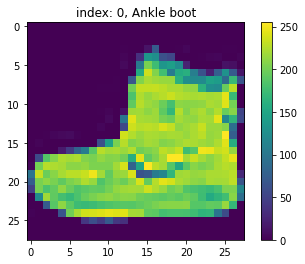

In [91]:
### 패션의 종류인 10개 분류와 그리기  

class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_labels[0])
print(class_name[train_labels[0]])

plt.figure()
plt.imshow(train_images[0])
plt.title('index: 0, ' + class_names[train_labels[0]])
plt.colorbar()

plt.show()


### Matplotlib

- **subplot**

```py
plt.figure(figsize=(10, 6))  

plt.subplot(2, 2, 1)
plt.subplot(2, 2, 2)
plt.subplot(2, 2, 3)
plt.subplot(2, 2, 4)

plt.show()
```

```py
plt.figure(figsize=(10, 6))  

plt.subplot(2, 2, 1)
plt.subplot(2, 2, 2)

# 2행 1열로 잡은 공간에 2번째로 지정하게 되면서 위 그림 상 밑에 간 plot 공간이 잡힘
plt.subplot(2, 1, 2)

plt.show()
```

```py
plt.figure(figsize=(10, 6))  

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(425)
plt.subplot(426)
# plt.subplot(413)
plt.subplot(414)

plt.show()
```

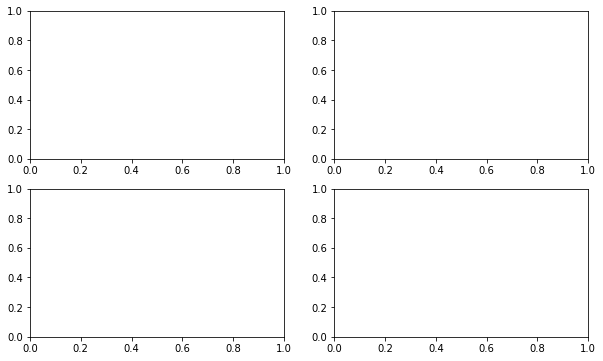

In [92]:
### Matplotlib

plt.figure(figsize=(10, 6))  

plt.subplot(2, 2, 1)
plt.subplot(2, 2, 2)
plt.subplot(2, 2, 3)
plt.subplot(2, 2, 4)

plt.show()

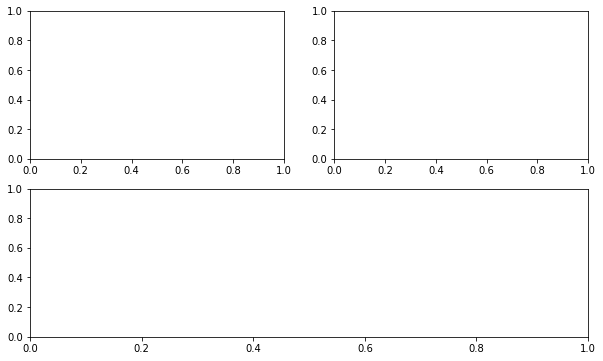

In [93]:
plt.figure(figsize=(10, 6))  

plt.subplot(2, 2, 1)
plt.subplot(2, 2, 2)

# 2행 1열로 잡은 공간에 2번째로 지정하게 되면서 위 그림 상 밑에 간 plot 공간이 잡힘
plt.subplot(2, 1, 2)

plt.show()

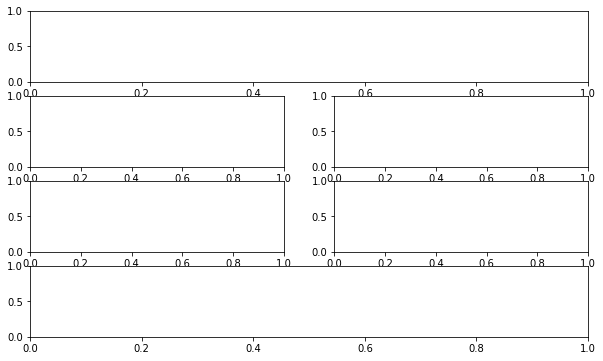

In [96]:
plt.figure(figsize=(10, 6))  

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(425)
plt.subplot(426)
# plt.subplot(413)
plt.subplot(414)

plt.show()

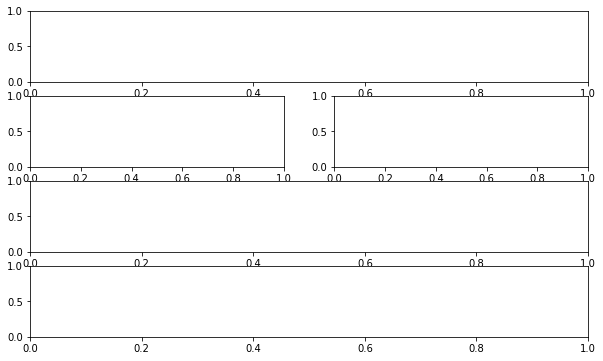

In [97]:
plt.figure(figsize=(10, 6))  

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(425)
plt.subplot(426)
plt.subplot(413)
plt.subplot(414)

plt.show()

### subplot() 그리기

```py
import numpy as np

x = np.arange(0, 5, 0.01)

plt.figure(figsize=(10, 12))

plt.subplot(411)
plt.plot(x, np.sqrt(x))
plt.grid()

plt.subplot(423)
plt.plot(x, x**2)
plt.grid()

plt.subplot(424)
plt.plot(x, x**3)
plt.grid()

plt.subplot(413)
plt.plot(x, np.sin(x))
plt.grid()

plt.subplot(414)
plt.plot(x, np.cos(x))
plt.grid()

plt.subplot(529)
plt.plot(x, np.exp(x))
plt.grid()

plt.subplot(5, 2, 10)
plt.plot(x, np.exp(-x))
plt.grid()

plt.show()
```

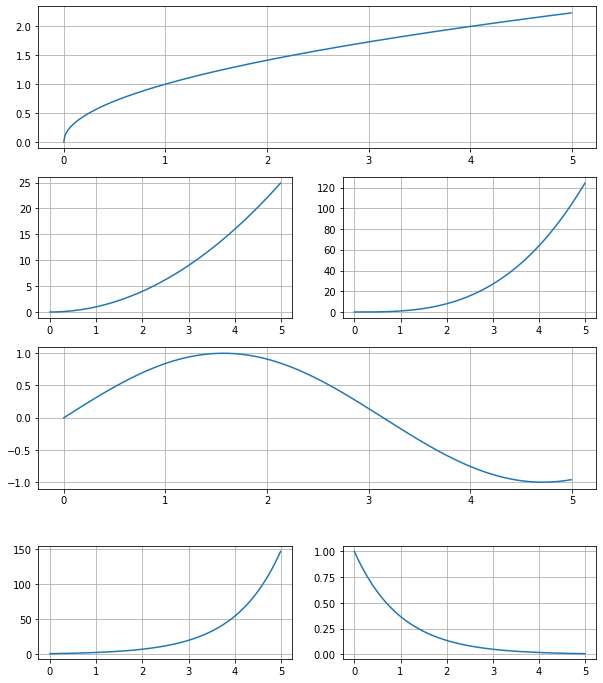

In [98]:
### subplot() 그리기

x = np.arange(0, 5, 0.01)

plt.figure(figsize=(10, 12))

plt.subplot(411)
plt.plot(x, np.sqrt(x))
plt.grid()

plt.subplot(423)
plt.plot(x, x**2)
plt.grid()

plt.subplot(424)
plt.plot(x, x**3)
plt.grid()

plt.subplot(413)
plt.plot(x, np.sin(x))
plt.grid()

plt.subplot(414)
plt.plot(x, np.cos(x))
plt.grid()

plt.subplot(529)
plt.plot(x, np.exp(x))
plt.grid()

plt.subplot(5, 2, 10)
plt.plot(x, np.exp(-x))
plt.grid()

plt.show()


### 훈련 자료 첫 30개 그려보기  

```py
plt.figure(figsize=(12, 10))
for i in range(30):
  plt.subplot(5, 6 ,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()
```

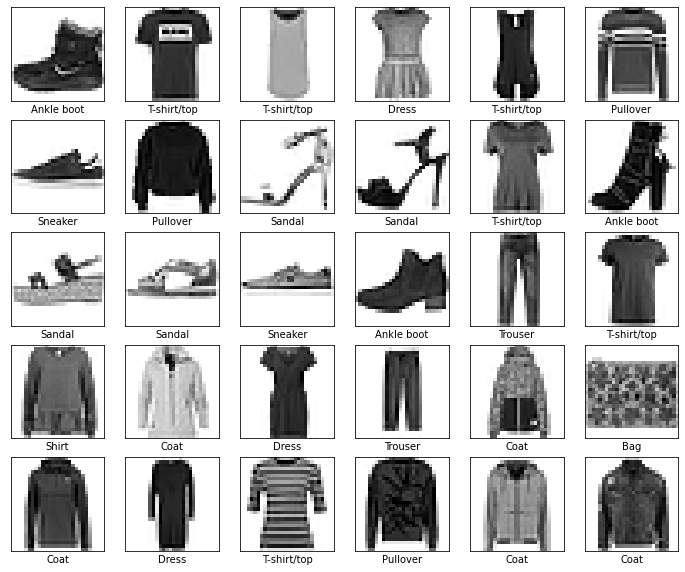

In [99]:
### 훈련 자료 첫 30개 그려보기  

plt.figure(figsize=(12, 10))
for i in range(30):
  plt.subplot(5, 6 ,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

### 랜덤하게 30개의 훈련용 자료 그리기 

```py
from random import sample

rows, cols = 5, 6 # 출력 가로 세로 수 ; 30개
idx = sorted(sample(range(len(train_images)), rows * cols))  
print(idx)

cnt = 0
plt.figure(figsize=(12, 10))

for i in idx:
  cnt += 1
  plt.subplot(rows, cols, cnt)
  tmp = str(i) + ' ' + str(class_names[train_labels[i]])
  plt.title(tmp)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap='Greys')

plt.tight_layout()
plt.show()
```

[2678, 3072, 5989, 9221, 11074, 11209, 11694, 12543, 13817, 15450, 17321, 19759, 21705, 21706, 24675, 29066, 36553, 38452, 39301, 41682, 46215, 49225, 50810, 51375, 52546, 53512, 55696, 58544, 59113, 59288]


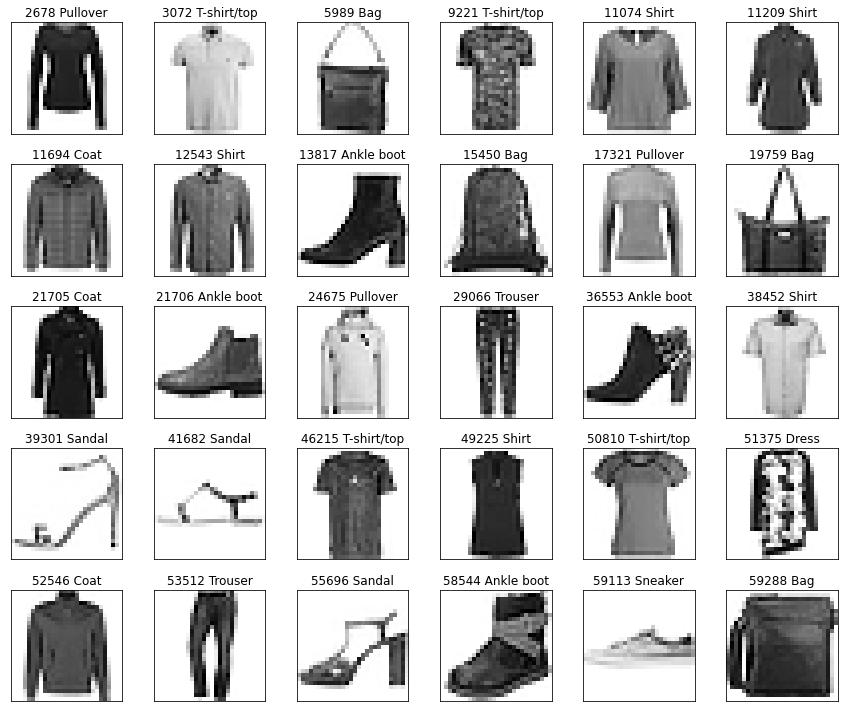

In [103]:
### 랜덤하게 30개의 훈련용 자료 그리기 

from random import sample

rows, cols = 5, 6 # 출력 가로 세로 수 ; 30개
idx = sorted(sample(range(len(train_images)), rows * cols)) 
print(idx)

cnt = 0
plt.figure(figsize=(12, 10))

for i in idx:
  cnt += 1
  plt.subplot(rows, cols, cnt)
  tmp = str(i) + ' ' + str(class_names[train_labels[i]])
  plt.title(tmp)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap='Greys')

plt.tight_layout()
plt.show()

### 훈련과 테스트

```py
train_images, test_images = train_images / 255.0, test_images / 255.0  

model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=3)

print('\n테스트 정확도: ', test_acc)
```

In [104]:
### 훈련과 테스트

train_images, test_images = train_images / 255.0, test_images / 255.0  

model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=3)

print('\n테스트 정확도: ', test_acc)

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4950 - accuracy: 0.8198 - val_loss: 0.3878 - val_accuracy: 0.8622
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3725 - accuracy: 0.8626 - val_loss: 0.3618 - val_accuracy: 0.8709
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3321 - accuracy: 0.8759 - val_loss: 0.3478 - val_accuracy: 0.8752
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3105 - accuracy: 0.8856 - val_loss: 0.3488 - val_accuracy: 0.8778
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2921 - accuracy: 0.8893 - val_loss: 0.3517 - val_accuracy: 0.8667
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2719 - accuracy: 0.8978 - val_loss: 0.3293 - val_accuracy: 0.8789
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2582 - accuracy: 0.9020 - val_loss: 0.3209 - val_accuracy:

### 학습 과정 시각화

```py
# Fashion MNIST 분류 모델 학습 결과 시각화  

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
```

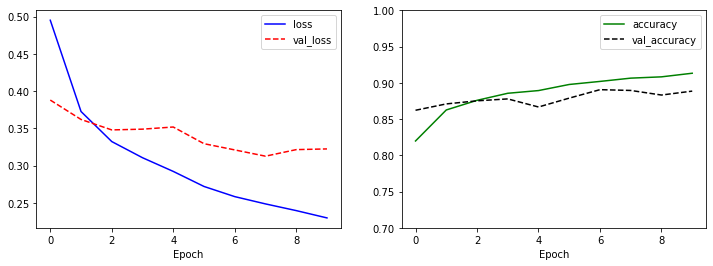

In [105]:
### 학습 과정 시각화

# Fashion MNIST 분류 모델 학습 결과 시각화  

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

### 막대 그래프  

- **plt.bar**

```py
predictions_array = [.1, .15, .2, .05, .5]
predicted_label = np.argmax(predictions_array) # 4
true_label = 2;

# 막대 그래프 그리기
thisplot = plt.bar(range(5), predictions_array, color="#999999")  

# 부분 막대의 색상 수정 
thisplot[0].set_color('yellow')
thisplot[predicted_label].set_color('red')
thisplot[true_label].set_color('blue')

plt.ylim([0, 1])
plt.show()
```

```py
import matplotlib as mpl
import matplotlib.pylab as plt

# 한글 처리
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

y = [2, 3, 1]
x = np.arange(len(y))

xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))

plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()
```


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

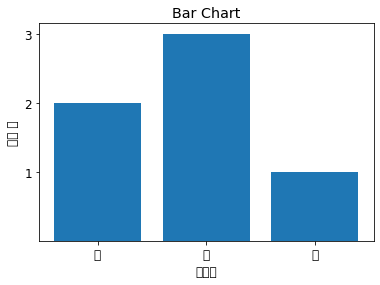

In [109]:
### 막대 그래프  

import matplotlib as mpl
import matplotlib.pylab as plt

# 한글 처리
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

y = [2, 3, 1]
x = np.arange(len(y))

xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))

plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

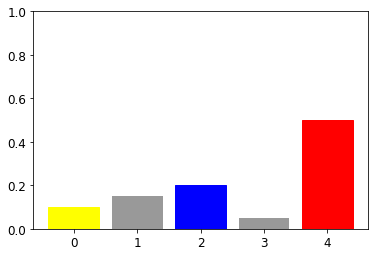

In [111]:
### 막대 그래프  

predictions_array = [.1, .15, .2, .05, .5]
predicted_label = np.argmax(predictions_array) # 4
true_label = 2;

# 막대 그래프 그리기
thisplot = plt.bar(range(5), predictions_array, color="#999999")  

# 부분 막대의 색상 수정 
thisplot[0].set_color('yellow')
thisplot[predicted_label].set_color('red')
thisplot[true_label].set_color('blue')

plt.ylim([0, 1])
plt.show()

### 이미지 그리기 

- **X 레이블 색상**  

```py
# 이미지 그리기 (첨자, 예측(확률 값), 결과(일반숫자), 이미지)
# 하단에 예측한 이름과 확률을 출력(정답이면 파란색, 오답이면 빨간색)
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

  plt.xticks([])
  plt.yticks([])

  predicted_label = np.argmax(predictions_array) # 예측한 확률 값 추출

  # 하단 x 축 글: 정답이면 파란색, 오답이면 빨간색으로 그리기  
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  maxprob = np.max(predictions_array) # 예측의 최대 확률 값  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
  100 * maxprob, class_names[true_label]), color= color)


  plt.imshow(img, cmap=plt.cm.binary)
```

In [112]:
### 이미지 그리기 

# 이미지 그리기 (첨자, 예측(확률 값), 결과(일반숫자), 이미지)
# 하단에 예측한 이름과 확률을 출력(정답이면 파란색, 오답이면 빨간색)
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

  plt.xticks([])
  plt.yticks([])

  predicted_label = np.argmax(predictions_array) # 예측한 확률 값 추출

  # 하단 x 축 글: 정답이면 파란색, 오답이면 빨간색으로 그리기  
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  maxprob = np.max(predictions_array) # 예측의 최대 확률 값  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
  100 * maxprob, class_names[true_label]), color= color)


  plt.imshow(img, cmap=plt.cm.binary)

### 그림 예측 결과와 확률 값 시각화

- **결과인 원 핫 인코딩**

  - 10개 값의 시각화  

```py
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]

  # plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.ylim([0, 1])

  thisplot = plt.bar(range(10), predictions_array, color="#447777")

  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  # X 레이블을 그리기 위해

  x = np.arange(10)
  xlabel = np.arange(10)
  plt.xticks(x, xlabel)
```


```py
# 테스트 데이터의 첫번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인  

predictions = model.predict(test_images)

i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(1, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()
```

In [113]:
### 그림 예측 결과와 확률 값 시각화

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]

  # plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.ylim([0, 1])

  thisplot = plt.bar(range(10), predictions_array, color="#447777")

  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  # X 레이블을 그리기 위해

  x = np.arange(10)
  xlabel = np.arange(10)
  plt.xticks(x, xlabel)

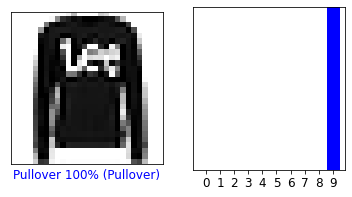

In [114]:
### 그림 예측 결과와 확률 값 시각화

# 테스트 데이터의 첫번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인  

predictions = model.predict(test_images)

i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(1, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()


### 테스트 데이터 첫 15개 그리기  

```py
# 처음 x 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파란색으로 잘못된 예측은 빨간색으로 나타낸다  

num_rows = 5
num_cols = 3

num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

plt.tight_layout()
plt.show()
```

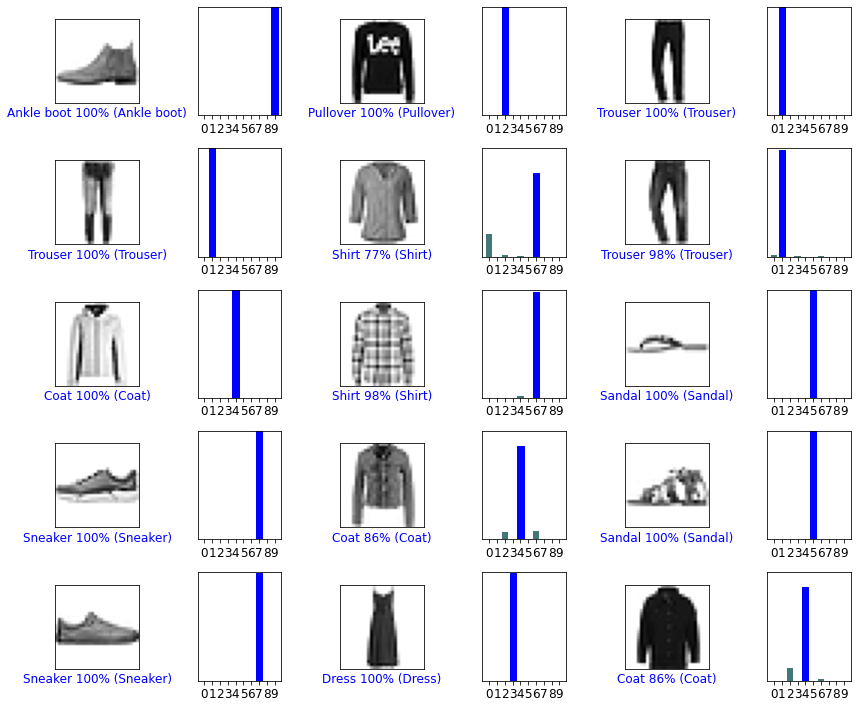

In [115]:
### 테스트 데이터 첫 15개 그리기  

# 처음 x 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파란색으로 잘못된 예측은 빨간색으로 나타낸다  

num_rows = 5
num_cols = 3

num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

plt.tight_layout()
plt.show()

### 예측이 잘못된 30개 그리기  

```py
# 예측이 틀린 것 첨자를 저장할 리스트  
pred_result = model.predict(test_images)

# 원 핫 인코딩을 일반 데이터로 변환
pred_labels = tf.argmax(pred_result, axis=1)

mispred = []
for i in range(0, len(test_labels)):
  if pred_labels[i] != test_labels[i]:
    mispred.append(i)

print('정답이 틀린 수 ',  len(mispred))

# 랜덤하게 틀린 것 30개의 첨자 리스트 생성
samples = sorted(sample(mispred, 30))
print(samples)


# 틀린 것 30개 그리기
count = 0
rows, cols = 6, 5
plt.figure(figsize=(12, 10))

for i in samples:
  count += 1
  plt.subplot(rows, cols, count)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i].reshape(28, 28), cmap='Greys', interpolation='nearest')
  tmp = str(class_names[test_labels[i]]) + ", pred: " + str(class_names[pred_labels[i]])
  plt.title(tmp)

plt.tight_layout()
plt.show()
```

정답이 틀린 수  1194
[787, 902, 1110, 1496, 1686, 1732, 1856, 1905, 2078, 2311, 3351, 3690, 4685, 4852, 5257, 5397, 5468, 5597, 5740, 5853, 6293, 6949, 7210, 7551, 7976, 8114, 8140, 8618, 8758, 9133]


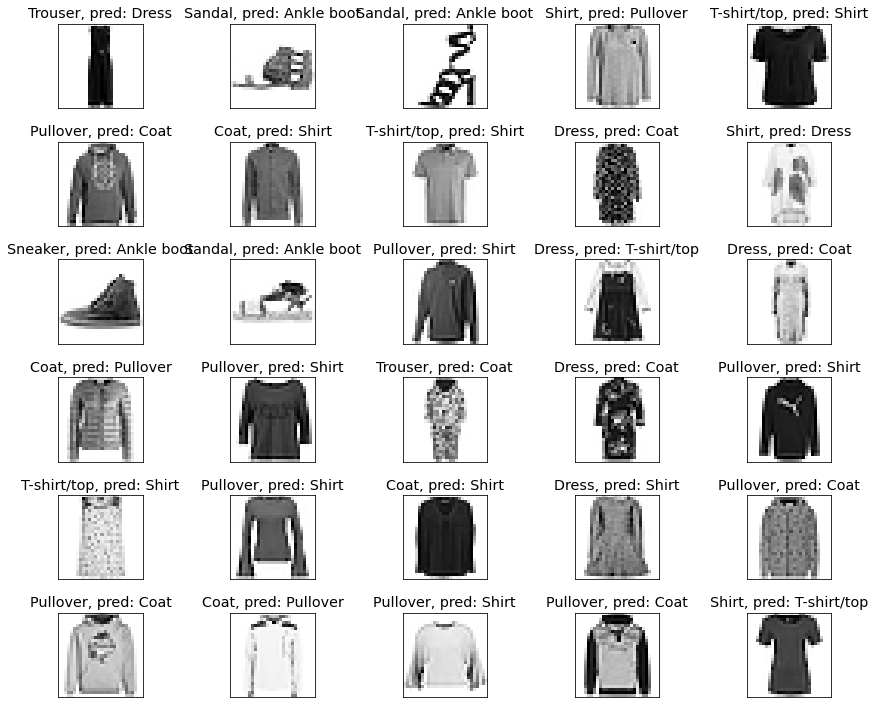

In [116]:
### 예측이 잘못된 30개 그리기  

# 예측이 틀린 것 첨자를 저장할 리스트  
pred_result = model.predict(test_images)

# 원 핫 인코딩을 일반 데이터로 변환
pred_labels = tf.argmax(pred_result, axis=1)

mispred = []
for i in range(0, len(test_labels)):
  if pred_labels[i] != test_labels[i]:
    mispred.append(i)

print('정답이 틀린 수 ',  len(mispred))

# 랜덤하게 틀린 것 30개의 첨자 리스트 생성
samples = sorted(sample(mispred, 30))
print(samples)


# 틀린 것 30개 그리기
count = 0
rows, cols = 6, 5
plt.figure(figsize=(12, 10))

for i in samples:
  count += 1
  plt.subplot(rows, cols, count)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i].reshape(28, 28), cmap='Greys', interpolation='nearest')
  tmp = str(class_names[test_labels[i]]) + ", pred: " + str(class_names[pred_labels[i]])
  plt.title(tmp)

plt.tight_layout()
plt.show()

### 예측이 잘못된 30개 예측 확률과 함께 그리기  

```py
count = 0
rows, cols = 10, 6
plt.figure(figsize=(22, 30))

for i in samples:
  count += 1
  plt.subplot(rows, cols, count)
  plot_image(i, pred_result, test_labels, test_images)
  count += 1
  plt.subplot(rows, cols, count)
  plot_value_array(i, pred_result, test_labels)

plt.tight_layout()
plt.show()
```

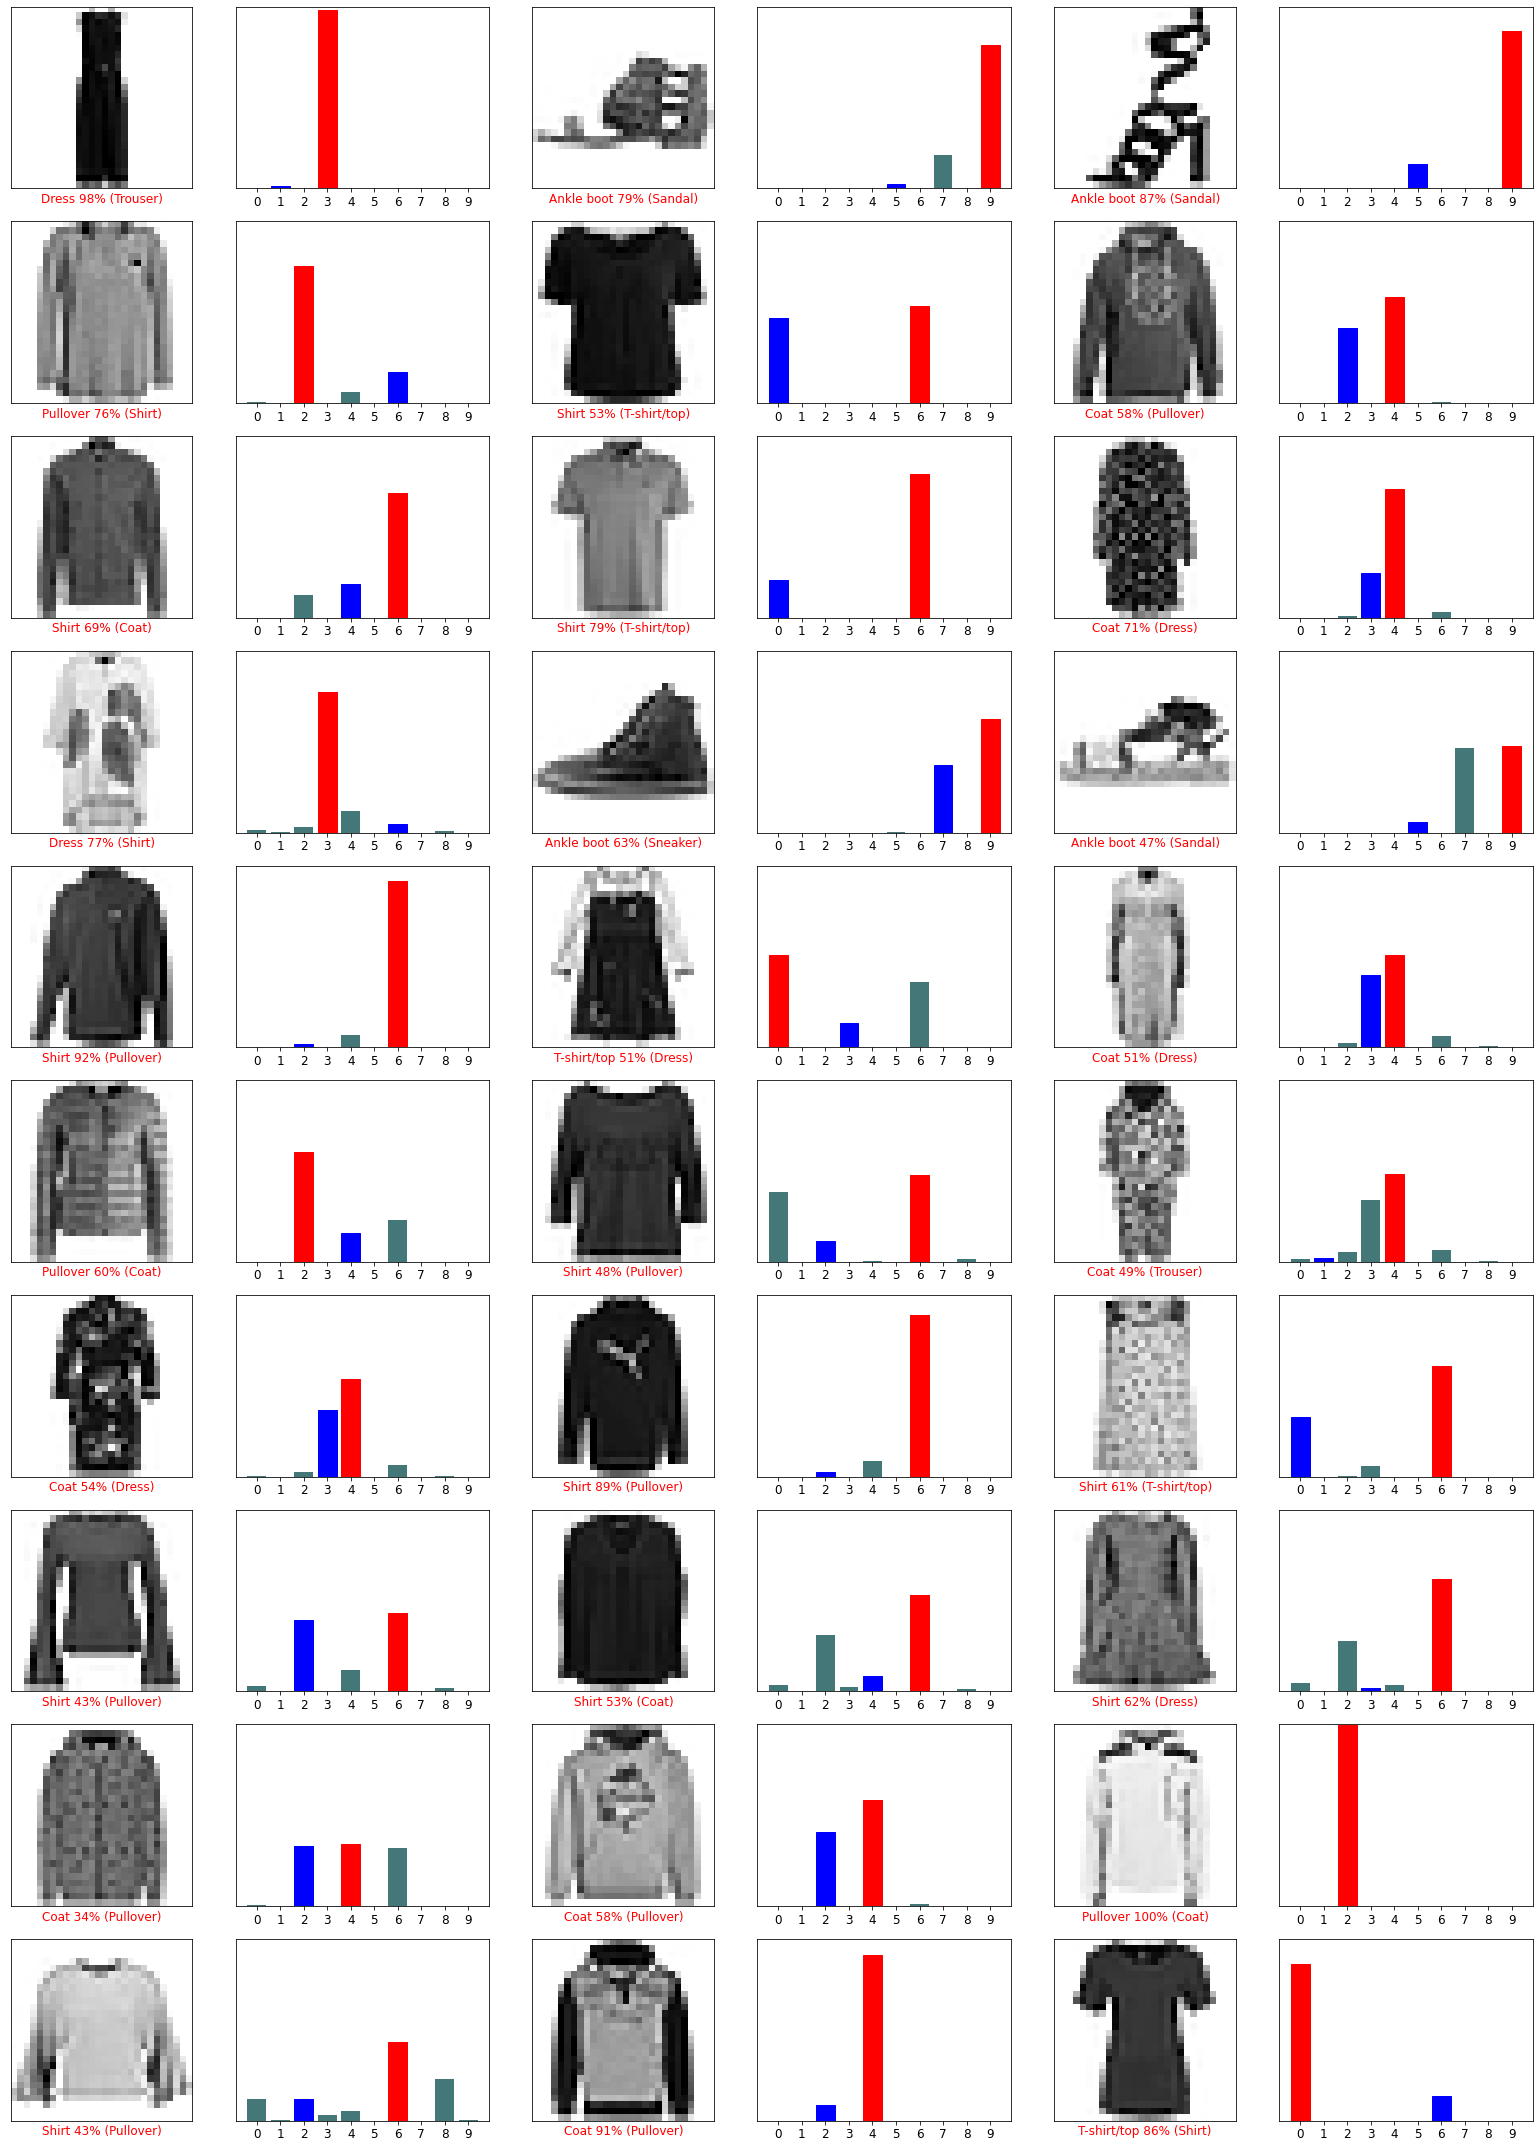

In [118]:
### 예측이 잘못된 30개 예측 확률과 함께 그리기  

count = 0
rows, cols = 10, 6
plt.figure(figsize=(22, 30))

for i in samples:
  count += 1
  plt.subplot(rows, cols, count)
  plot_image(i, pred_result, test_labels, test_images)
  count += 1
  plt.subplot(rows, cols, count)
  plot_value_array(i, pred_result, test_labels)

plt.tight_layout()
plt.show()

## 예측이 잘못된 것들은 손실률이 크다

따라서 손실 함수 직접 구하기

### 손실 함수 직접 구하기  

- **tf.keras.losses.SparseCategoricalCrossentropy()**

  - 정답의 원 핫 인코딩 불필요

```py
# @tf.function
def get_loss(label, prob):
  cce = tf.keras.losses.SparseCategoricalCrossentropy()
  loss = cce(tf.convert_to_tensor(label), tf.convert_to_tensor(prob))

  return loss

print("CCE: ", get_loss([2], [[0.2, .1, .3, .4]]).numpy())
print("CCE: ", get_loss(2, [0.2, .1, .3, .4]).numpy())
print("CCE: ", get_loss(3, [0.2, .1, .3, .4]).numpy())
print("CCE: ", get_loss(5, [3.5794352e-07, 1.6668336e-09, 1.2257135e-07, 3.7462252e-07, 4.4686758e-06, 6.8782866e-02, 1.0355227e-06, 5.1593245e-04, 2.1532403e-09, 9.3069482e-01]).numpy())
print("CCE: ", get_loss(9, [3.5794352e-07, 1.6668336e-09, 1.2257135e-07, 3.7462252e-07, 4.4686758e-06, 6.8782866e-02, 1.0355227e-06, 5.1593245e-04, 2.1532403e-09, 9.3069482e-01]).numpy())
```

In [123]:
### 손실 함수 직접 구하기  

# @tf.function
def get_loss(label, prob):
  cce = tf.keras.losses.SparseCategoricalCrossentropy()
  loss = cce(tf.convert_to_tensor(label), tf.convert_to_tensor(prob))

  return loss

print("CCE: ", get_loss([2], [[0.2, .1, .3, .4]]).numpy())
print("CCE: ", get_loss(2, [0.2, .1, .3, .4]).numpy())
print("CCE: ", get_loss(3, [0.2, .1, .3, .4]).numpy())
print("CCE: ", get_loss(5, [3.5794352e-07, 1.6668336e-09, 1.2257135e-07, 3.7462252e-07, 4.4686758e-06, 6.8782866e-02, 1.0355227e-06, 5.1593245e-04, 2.1532403e-09, 9.3069482e-01]).numpy())
print("CCE: ", get_loss(9, [3.5794352e-07, 1.6668336e-09, 1.2257135e-07, 3.7462252e-07, 4.4686758e-06, 6.8782866e-02, 1.0355227e-06, 5.1593245e-04, 2.1532403e-09, 9.3069482e-01]).numpy())

CCE:  1.2039728
CCE:  1.2039728
CCE:  0.91629076
CCE:  2.6768007
CCE:  0.07182401


### 훈련 데이터에 대해 크로스 엔트로피 값 모두 알기

```py
def get_loss(label, prob):
  cce = tf.keras.losses.SparseCategoricalCrossentropy()
  loss = cce(tf.convert_to_tensor(label), tf.convert_to_tensor(prob))
  return loss

pred_labels = model.predict(test_images)

# 모든 테스트 데이터의 크로스 엔트로피 값을 저장
cces = []
for i in range(len(test_images)):
  cces.append(get_loss(test_labels[i], pred_labels[i]).numpy())

print(len(cces))
print(cces[:10])
```

In [124]:
### 훈련 데이터에 대해 크로스 엔트로피 값 모두 알기

def get_loss(label, prob):
  cce = tf.keras.losses.SparseCategoricalCrossentropy()
  loss = cce(tf.convert_to_tensor(label), tf.convert_to_tensor(prob))
  return loss

pred_labels = model.predict(test_images)

# 모든 테스트 데이터의 크로스 엔트로피 값을 저장
cces = []
for i in range(len(test_images)):
  cces.append(get_loss(test_labels[i], pred_labels[i]).numpy())

print(len(cces))
print(cces[:10])

10000
[0.00038938093, 0.0012669879, 2.384183e-06, 1.6689287e-06, 0.26492825, 0.019674158, 4.1723165e-06, 0.022030858, 9.5367386e-07, 1.633154e-05]


### Numpy의 argsort()

- **정렬을 위한 첨자 알기**  

  - 정렬의 첨자를 알아내고 이를 사용하여 정렬하는 방법  

```py
import numpy as np
a = np.random.randint(0, 20, 10)
a
```

```py
np.argsort(a)  # 오름 차순(순방향) 정렬의 첨자 값
```

```py
np.argsort(-a) # 내림 차순(역방향) 정렬의 첨자 값
```

```py
# 가장 큰 값
print(a[np.argsort(a)[-1]])
print(a[np.argsort(-a)[0]])
```

```py
# 가장 작은 값
print(a[np.argsort(a)[0]])
print(a[np.argsort(-a)[-1]])
```

```py
# 오름차순으로 값 출력
for _ in range(len(a)):
  print(a[np.argsort(a)[_]], end=" ")
```

```py
# 내림차순으로 값 출력
for _ in range(len(a)):
  print(a[np.argsort(-a)[_]], end=" ")
```

### 손실 값이 가장 큰 순으로 첨자 알아 내기  

- **예측 막대 그래프에서 손실 값(CCE) 쓰기**

```py
# 예측(원핫인코딩) 값을 막대그래프로 그리기(정답이면 파란색, 오답이면 빨간색)
# X 레이블에 손실값 CCE를 출력

def plot_value_cce_array(i, predictions_array, true_label):
  plot_value_array(i, predictions_array, true_label)
  plt.title('CCE: ' + str(get_loss(true_label[i], predictions_array[i]).numpy()))
```

```py
# 손실값이 큰 순으로 첨자를 지정

arycces = np.array(cces)
lst_arg = np.argsort(-arycces)

for i in range(20):
  print(cces[lst_arg[i]], end = ' ')
print()
```

In [125]:
### 손실 값이 가장 큰 순으로 첨자 알아 내기  

# 예측(원핫인코딩) 값을 막대그래프로 그리기(정답이면 파란색, 오답이면 빨간색)
# X 레이블에 손실값 CCE를 출력

def plot_value_cce_array(i, predictions_array, true_label):
  plot_value_array(i, predictions_array, true_label)
  plt.title('CCE: ' + str(get_loss(true_label[i], predictions_array[i]).numpy()))

# 손실값이 큰 순으로 첨자를 지정

arycces = np.array(cces)
lst_arg = np.argsort(-arycces)

for i in range(20):
  print(cces[lst_arg[i]], end = ' ')
print()

16.118095 16.118095 15.990283 13.979058 13.8970375 11.614371 11.472424 10.439078 10.290604 10.004149 9.718072 9.542459 9.5421505 9.116061 9.087038 9.072305 8.731756 8.69425 8.577429 8.532114 


### 손실 갑싱 가장 큰 30 개 그리기

```py
# 손실 값이 큰 순으로 30개를 출력

count = 0
rows, cols = 10, 6
plt.figure(figsize=(22, 30))

for i in range(30):
  count += 1
  plt.subplot(rows, cols, count)
  plot_image(lst_arg[i], pred_result, test_labels, test_images)
  count += 1
  plt.subplot(rows, cols, count)
  plot_value_cce_array(lst_arg[i], pred_result, test_labels)

plt.tight_layout()
plt.show()
```


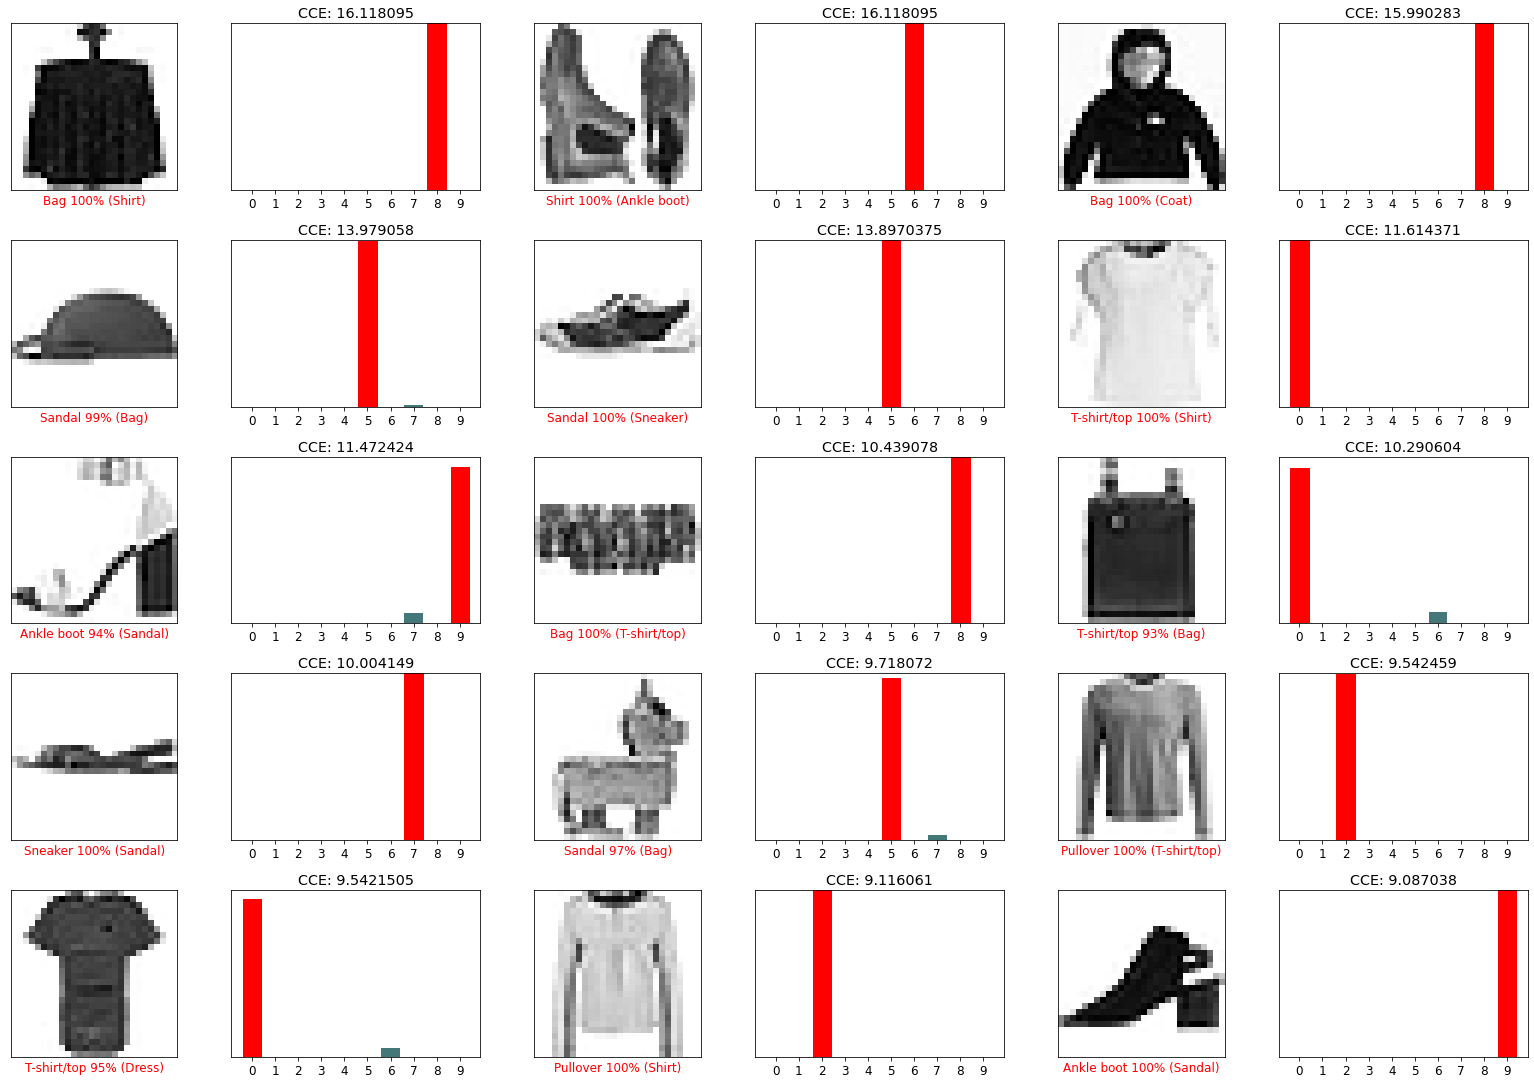

In [127]:
### 손실 갑싱 가장 큰 15개 그리기

# 손실 값이 큰 순으로 15개를 출력

count = 0
rows, cols = 10, 6
plt.figure(figsize=(22, 30))

for i in range(15):
  count += 1
  plt.subplot(rows, cols, count)
  plot_image(lst_arg[i], pred_result, test_labels, test_images)
  count += 1
  plt.subplot(rows, cols, count)
  plot_value_cce_array(lst_arg[i], pred_result, test_labels)

plt.tight_layout()
plt.show()